# Least squares

A mathematical procedure for finding the best-fitting curve to a given set of points by minimizing the sum of the squares of the offsets ("the residuals") of the points from the curve. The sum of the squares of the offsets is used instead of the offset absolute values because this allows the residuals to be treated as a continuous differentiable quantity. However, because squares of the offsets are used, outlying points can have a disproportionate effect on the fit, a property which may or may not be desirable depending on the problem at hand. 


### Show the data


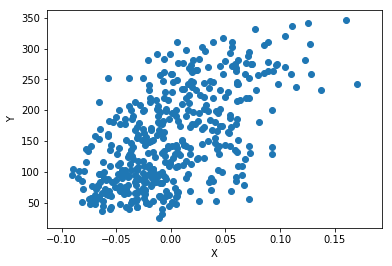

In [64]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets

# load data
d = datasets.load_diabetes()

X = d.data[:, 2]
Y = d.target

# draw original data
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


### Theory
For $N$ observation data:
$$
\mathbf{X} = \{x_1, x_2, ..., x_N \} \\
\mathbf{Y} = \{y_1, y_2, ..., y_N \}
$$

We want to find the model which can predict the data. The simplest model is linear model, which has the form of 
$$
y = ax + b
$$

The purpose is to find parameters $a, b$ which best fit the model to the observation data. 

We use the sum of squares to measure the differences (loss function) between the model's prediction and observation data:
$$
L = \sum_{i=1}^{N} (y_i - a x_i + b)^2
$$

To make the loss function minimize, we can find the parameters:
$$
\frac{\partial L}{\partial a} = -2 \sum_{i=1}^{N} (y_i - a x_i - b) x_i \\
\frac{\partial L}{\partial b} = -2 \sum_{i=1}^{N} (y_i - a x_i - b)
$$
When the loss is minimized, therefore the partial difference is zero, then we can get:
$$
-2 \sum_{i=1}^{N} (y_i - a x_i - b) x_i = 0 \\
-2 \sum_{i=1}^{N} (y_i - a x_i - b) = 0 \\
$$

We reoder the items as:
$$
a \sum x_i^2 + b \sum x_i = \sum y_i x_i \\
a \sum x_i + b N = \sum y_i
$$
By solving the linear equation we can obtain the model parameters.

### Program

a = 949.435260, b = 152.133484


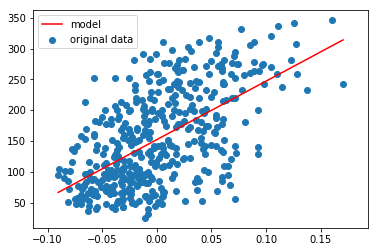

In [65]:
N = X.shape[0]

S_X2 = np.sum(X*X)
S_X  = np.sum(X)
S_XY = np.sum(X*Y)
S_Y  = np.sum(Y)

A1 = np.array([[S_X2, S_X], 
               [S_X, N]])
B1 = np.array([S_XY, S_Y])

coeff = np.linalg.inv(A1).dot(B1)

print('a = %f, b = %f' % (coeff[0], coeff[1]))

x_min = np.min(X)
x_max = np.max(X)
y_min = coeff[0] * x_min + coeff[1]
y_max = coeff[0] * x_max + coeff[1]

plt.scatter(X, Y, label='original data')
plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
plt.legend()
plt.show()

## How to fit polynomial function?

If we observe a missle at some time, then how to estimate the trajectory? Acoording the physical theory, the trajectory can be formulated as:
$$
y = at^2 + bt + c
$$
The we need at least three data to compute the parameters $a, b, c$.



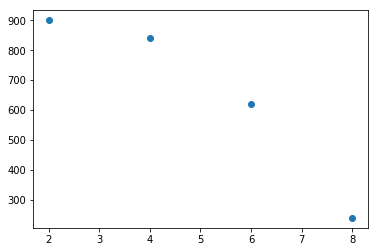

In [45]:
t = np.array([2, 4, 6, 8])
#t = np.linspace(0, 10)

pa = -20
pb = 90
pc = 800

y = pa*t**2 + pb*t + pc


plt.scatter(t, y)
plt.show()

## How to use sklearn to solve linear problem?



a = 949.435260, b = 152.133484


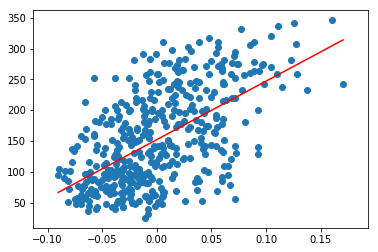

In [36]:
from sklearn import linear_model

# load data
d = datasets.load_diabetes()

X = d.data[:, np.newaxis, 2]
Y = d.target

# create regression model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

a, b = regr.coef_, regr.intercept_
print("a = %f, b = %f" % (a, b))

x_min = np.min(X)
x_max = np.max(X)
y_min = a * x_min + b
y_max = a * x_max + b

plt.scatter(X, Y)
plt.plot([x_min, x_max], [y_min, y_max], 'r')
plt.show()

## How to use sklearn to fit polynomial function?

In [42]:
# Fitting polynomial functions

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

t = np.array([2, 4, 6, 8])

pa = -20
pb = 90
pc = 800

y = pa*t**2 + pb*t + pc

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(t[:, np.newaxis], y)
model.named_steps['linear'].coef_


array([800.,  90., -20.])

## How to estimate some missing value by the model?


Y_est  =  [148.6844971  167.17376752 174.36403934 195.93485483 109.65159289
 120.95059148 245.23957594 204.15230835 269.89193649  75.75459712
 241.13084918 104.51568444 141.49422527 126.08649992 208.26103511
 233.94057735 151.76604217 158.956314   161.01067738 228.8046689
 220.58721538 129.16804499 100.40695768 117.86904641 168.2009492
 226.75030552 114.78750134 163.06504076 113.76031965 119.92340979
 157.92913231 237.02212242 120.95059148  98.3525943  123.00495485
 205.17949004  95.27104923 153.82040555 130.19522668  81.91768726
 171.28249427 137.38549851 137.38549851 189.77176469  82.94486895]
Y_test =  [198. 242. 232. 175.  93. 168. 275. 293. 281.  72. 140. 189. 181. 209.
 136. 261. 113. 131. 174. 257.  55.  84.  42. 146. 212. 233.  91. 111.
 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.  48. 178. 104.
 132. 220.  57.]
err = 8.437628, score = 0.422889
a = 953.024850, b = 152.544562


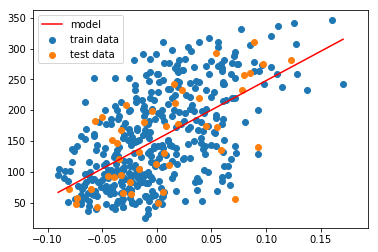

In [67]:
# load data
d = datasets.load_diabetes()

N = d.target.shape[0]
N_train = int(N*0.9)
N_test = N - N_train

X = d.data[:N_train, np.newaxis, 2]
Y = d.target[:N_train]

X_test = d.data[N_train:, np.newaxis, 2]
Y_test = d.target[N_train:]

# create regression model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_est = regr.predict(X_test)
print("Y_est  = ", Y_est)
print("Y_test = ", Y_test)
err = (Y_est - Y_test)**2
score = regr.score(X_test, Y_test)
print("err = %f, score = %f" % (np.sqrt(np.sum(err))/N_test, score))


# plot data
a, b = regr.coef_, regr.intercept_
print("a = %f, b = %f" % (a, b))

x_min = np.min(X)
x_max = np.max(X)
y_min = a * x_min + b
y_max = a * x_max + b


plt.scatter(X, Y, label='train data')
plt.scatter(X_test, Y_test, label='test data')
plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
plt.legend()
plt.show()